In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
target = pd.read_csv("proc_data/target.csv", parse_dates=['dt'])
target.head()

,dt,value
0,1999-01-01 00:00:00,0
1,1999-01-01 03:00:00,2
2,1999-01-01 06:00:00,1
3,1999-01-01 09:00:00,2
4,1999-01-01 12:00:00,2


In [3]:
df = target.rename(columns={"dt":"ds", "value":"y"})
df.head()

,ds,y
0,1999-01-01 00:00:00,0
1,1999-01-01 03:00:00,2
2,1999-01-01 06:00:00,1
3,1999-01-01 09:00:00,2
4,1999-01-01 12:00:00,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43832 entries, 0 to 43831
Data columns (total 2 columns):
ds    43832 non-null datetime64[ns]
y     43832 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 685.0 KB


In [5]:
from fbprophet import Prophet

In [6]:
prop = Prophet(interval_width=0.95)
prop.fit(df)

In [7]:
future = prop.make_future_dataframe(periods=365)
future.tail()

,ds
44192,2014-12-27 21:00:00
44193,2014-12-28 21:00:00
44194,2014-12-29 21:00:00
44195,2014-12-30 21:00:00
44196,2014-12-31 21:00:00


In [8]:
forecast = prop.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
44192,2014-12-27 21:00:00,1.699528,-1.157112,3.598269,1.150419,2.280268,-0.345841,-0.345841,-0.345841,0.105235,...,0.003740,0.003740,0.003740,-0.454816,-0.454816,-0.454816,0.0,0.0,0.0,1.353687
44193,2014-12-28 21:00:00,1.699673,-1.272317,3.723813,1.148354,2.282181,-0.350148,-0.350148,-0.350148,0.105235,...,-0.001785,-0.001785,-0.001785,-0.453598,-0.453598,-0.453598,0.0,0.0,0.0,1.349524
44194,2014-12-29 21:00:00,1.699818,-0.951705,3.806794,1.146331,2.284094,-0.330887,-0.330887,-0.330887,0.105235,...,0.014738,0.014738,0.014738,-0.450860,-0.450860,-0.450860,0.0,0.0,0.0,1.368931
44195,2014-12-30 21:00:00,1.699963,-0.924289,3.905914,1.144341,2.286007,-0.315657,-0.315657,-0.315657,0.105235,...,0.025620,0.025620,0.025620,-0.446512,-0.446512,-0.446512,0.0,0.0,0.0,1.384306
44196,2014-12-31 21:00:00,1.700108,-1.169109,3.785815,1.142352,2.287919,-0.338504,-0.338504,-0.338504,0.105235,...,-0.003250,-0.003250,-0.003250,-0.440489,-0.440489,-0.440489,0.0,0.0,0.0,1.361604


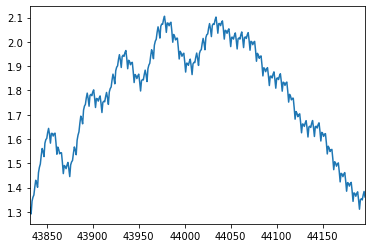

In [9]:
forecast.iloc[-365:, :].yhat.plot()

In [13]:
forecast.yhat.values.argmax(axis=-1)

12861